# Indian Premiere League  
Exploratory Data Analysis

AIM:
    1. To find most successful team.
    2. To find most successful player.
    3. Suggesting teams & players company should endorse.

In [1]:
# importing libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading datasets.
mat = pd.read_csv('matches.csv')
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [4]:
mat.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


Insights from above description:

1. Biggest winning of a team is by 146 runs.
2. Biggest winning of a team is by 10 wickets.
3. 75% of winning is by 19 runs by batting first and by 6 wickets when bowling first.

In [5]:
title_wins = mat.groupby(['season'])['winner'].value_counts()
title_wins

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

Creating a new table denoting list of winner's in each season.

In [6]:
year = 2008
WinnerBySeason = pd.DataFrame(columns = ["Season", "Winner"])
for i in title_wins.iteritems():
    #print(i)
    #print(i[0][0])
    #print(i[0][1])
    if i[0][0] == year:
        print(i)
        win_season = pd.DataFrame({
            "Season": [i[0][0]],
            "Winner": [i[0][1]]
        })
        WinnerBySeason = WinnerBySeason.append(win_season)
        year += 1

a = WinnerBySeason.reset_index(drop = True)
a

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


,Season,Winner
0,2008,Rajasthan Royals
1,2009,Delhi Daredevils
2,2010,Mumbai Indians
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kings XI Punjab
7,2015,Chennai Super Kings
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


Text(0.5, 1.0, 'Winners By Season')

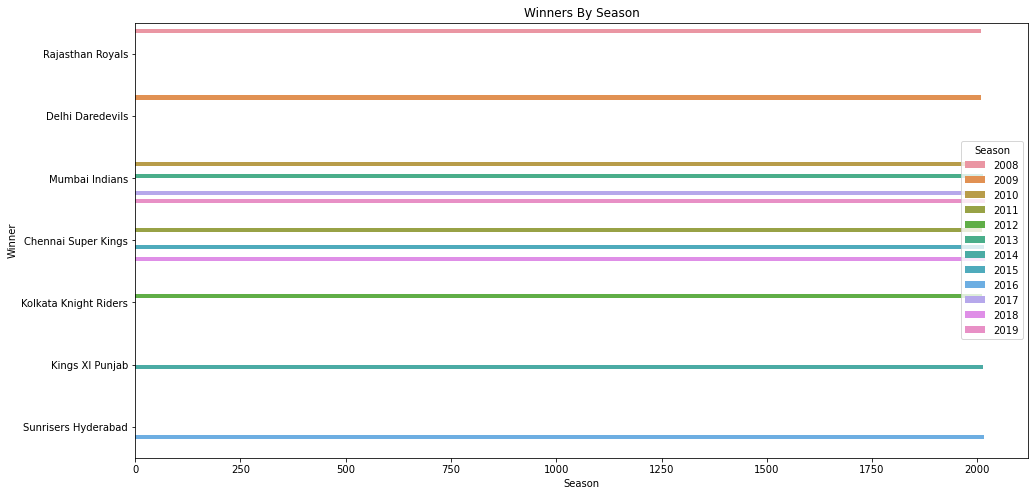

In [7]:
plt.figure(figsize = (16, 8))
sns.barplot(x = "Season", y = "Winner", data = WinnerBySeason, hue = "Season").set_title("Winners By Season")

From the graph Mumbai Indians have won the most titles than any other team.

In [40]:
WinPctBySeason = mat.groupby(["season"])["winner"].value_counts(normalize = True).mul(100).round(1).astype(str) + "%"
WinPctBySeason
#Calculating Win % of team's in every season.

season  winner                     
2008    Rajasthan Royals               22.4%
        Kings XI Punjab                17.2%
        Chennai Super Kings            15.5%
        Delhi Daredevils               12.1%
        Mumbai Indians                 12.1%
                                       ...  
2019    Kings XI Punjab                10.2%
        Kolkata Knight Riders          10.2%
        Sunrisers Hyderabad            10.2%
        Rajasthan Royals                8.5%
        Royal Challengers Bangalore     8.5%
Name: winner, Length: 100, dtype: object

From the above New Table, Chart and their Win % by Season we could derive Mumbai Indians(4 title wins) is the most successful team and can be choosen for endorsing.
Second most successful team of IPL is Chennai Super Kings(3 title wins).

In [79]:
MOMBySeason = mat.groupby(["season"])["player_of_match"].value_counts()
MOMBySeason

season  player_of_match
2008    SE Marsh           5
        SR Watson          4
        YK Pathan          4
        AC Gilchrist       2
        M Ntini            2
                          ..
2019    SL Malinga         1
        SPD Smith          1
        SS Iyer            1
        V Kohli            1
        VR Aaron           1
Name: player_of_match, Length: 514, dtype: int64

In [80]:
MOM = mat["player_of_match"].value_counts()
MOM

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
                  ..
Q de Kock          1
SB Jakati          1
RA Tripathi        1
AD Mascarenhas     1
RS Bopara          1
Name: player_of_match, Length: 226, dtype: int64

In [90]:
Top10MOM = pd.DataFrame(
    columns = ["Player", "No. of Times Player Of Match"]
)
count = 0
for i in MOM.iteritems():
    if count > 9:
        break
    else:
        df = pd.DataFrame({
            "Player": [i[0]],
            "No. of Times Player Of Match": [i[1]]
        })
        
        Top10MOM = Top10MOM.append(df, ignore_index = True)
        count += 1
Top10MOM

,Player,No. of Times Player Of Match
0,CH Gayle,21
1,AB de Villiers,20
2,DA Warner,17
3,RG Sharma,17
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,V Kohli,12


Text(0.5, 1.0, "Top 10 MOM Player's")

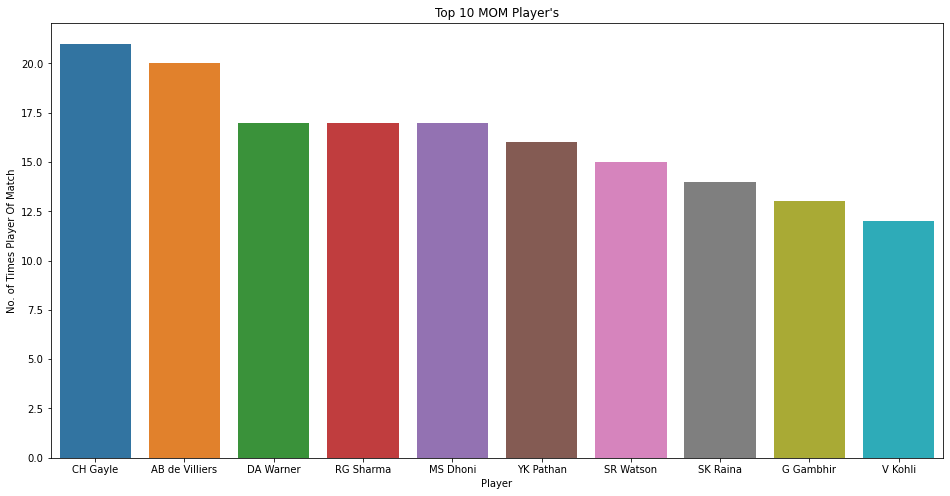

In [96]:
plt.figure(figsize = (16, 8))
sns.barplot(x = "Player", y = "No. of Times Player Of Match", data = Top10MOM).set_title("Top 10 MOM Player's")

Top performing palyer's are shown in above Table & Graph. Company should endorese such player's for their popularity.